In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm
import pytensor.tensor as pyt
import arviz as az
from datetime import datetime
import subprocess
from ElectionForecasting.src.modelling.DataLoader import DataLoader
from ElectionForecasting.src.root import ROOT_DIR
from ElectionForecasting.src.utils.backtesting_utilities import initialize_driver_and_data

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
INFO:root:SETTING DATE TO 2023-10-27


In [82]:
data_loader = DataLoader()
y = '2022'
driver = initialize_driver_and_data(y, data_loader)
(gam_forecasts_df, train_df, vote_shares, previous_year_pleans) = (
    driver.gam_forecast, driver.train, driver.state_train, driver.previous_year_pleans
)
driver.fit()
kwargs = dict(
    return_inferencedata = True,
    idata_kwargs = {'log_likelihood': True}
)
post_pred = driver.check(sample_posterior_predictive_kwargs=kwargs)

INFO:root:Initializing Driver object.
INFO:root:Loading pleans.
INFO:root:Loading state results.
INFO:root:Loading model inputs.
INFO:root:Loading GAM forecasts.
INFO:root:Loading pleans correlations.
INFO:root:Setting random seed to 123.
INFO:root:Building build_modelthe model.
INFO:root:Transforming input data.
INFO:root:Retrieving GAM forecast for 2022.
INFO:root:Performing categorical transformations.
INFO:root:Performing categorical transformations.
INFO:root:Fitting the model.
Auto-assigning NUTS sampler...
INFO:pymc.sampling.mcmc:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc.sampling.mcmc:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc.sampling.mcmc:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alphas, alpha_party_lag_3q, alpha_pop_vote_lag_3q, betas_gdp_lag_3q, betas_inflation_lag_3q, betas_stk_mkt_lag_3q, betas_unemployment_lag_3q]
INFO:pymc.sampling.mcmc:NUTS: [alphas, alpha_party_la

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 47 seconds.
INFO:pymc.sampling.mcmc:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 47 seconds.
Sampling: [observed_vote_share, party_effect_lag_3q, pop_vote_lag_3q]
INFO:pymc.sampling.forward:Sampling: [observed_vote_share, party_effect_lag_3q, pop_vote_lag_3q]


KeyError: 'posterior'

(12000, 4)


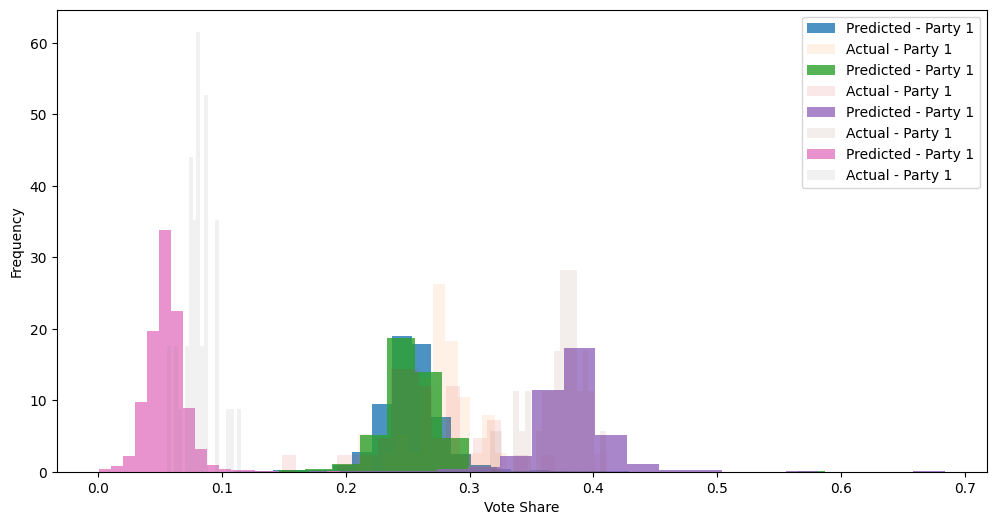

In [4]:
observed_vote_share = post_pred.posterior_predictive.daily_obs_vote_share.values[0,:,0,:]#.mean(axis=-2)
# observed_vote_share = driver.trace.posterior.state_vote_share.values.mean(axis=-2)
print(np.reshape(observed_vote_share, (-1,) + observed_vote_share.shape[2:]).shape)
observed_vote_share = np.reshape(observed_vote_share, (-1,) + observed_vote_share.shape[2:])
plt.figure(figsize=(12, 6))
vote_shares = driver.state_train.mean(axis=1)
# Replace 'observed_vote_share' with the actual name of your observed variable
for i in range(observed_vote_share.shape[1]):
    plt.hist(observed_vote_share[:, i], density=True, bins=20, alpha=0.8, label='Predicted - Party 1')
    plt.hist(vote_shares[:, i], density=True, bins=20, alpha=0.1, label='Actual - Party 1')

plt.xlabel('Vote Share')
plt.ylabel('Frequency')
plt.legend()
plt.show()

(4000, 4)


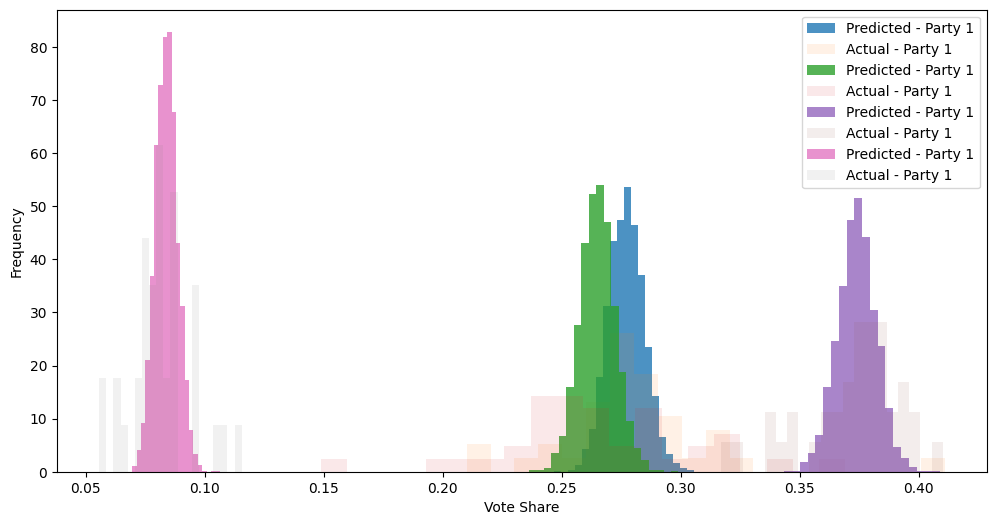

In [8]:
observed_vote_share = post_pred.posterior_predictive.observed_vote_share.values.mean(axis=-2)
# observed_vote_share = driver.trace.posterior.state_vote_share.values.mean(axis=-2)
print(np.reshape(observed_vote_share, (-1,) + observed_vote_share.shape[2:]).shape)
observed_vote_share = np.reshape(observed_vote_share, (-1,) + observed_vote_share.shape[2:])
plt.figure(figsize=(12, 6))
vote_shares = driver.state_train.mean(axis=1)
# Replace 'observed_vote_share' with the actual name of your observed variable
for i in range(observed_vote_share.shape[1]):
    plt.hist(observed_vote_share[:, i], density=True, bins=20, alpha=0.8, label='Predicted - Party 1')
    plt.hist(vote_shares[:, i], density=True, bins=20, alpha=0.1, label='Actual - Party 1')

plt.xlabel('Vote Share')
plt.ylabel('Frequency')
plt.legend()
plt.show()

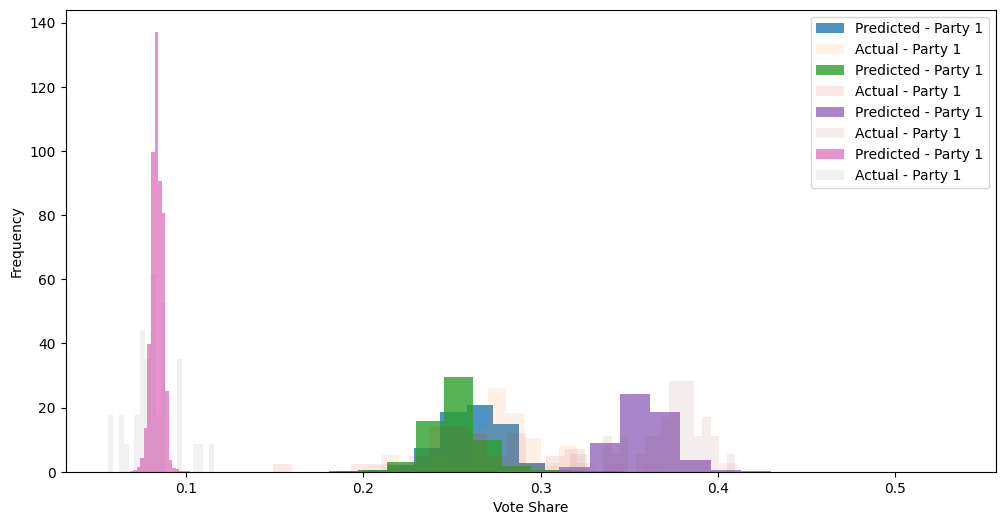

In [9]:
observed_vote_share = post_pred.posterior_predictive.state_vote_share.values.mean(axis=-2)
# observed_vote_share = driver.trace.posterior.state_vote_share.values.mean(axis=-2)
observed_vote_share = observed_vote_share.reshape(-1, 4)
# print(np.reshape(observed_vote_share, (-1,) + observed_vote_share.shape[2:]).shape)
# observed_vote_share = np.reshape(observed_vote_share, (-1,) + observed_vote_share.shape[2:])
plt.figure(figsize=(12, 6))
vote_shares = driver.state_train.mean(axis=1)
# Replace 'observed_vote_share' with the actual name of your observed variable
for i in range(observed_vote_share.shape[1]):
    plt.hist(observed_vote_share[:, i], density=True, bins=20, alpha=0.8, label='Predicted - Party 1')
    plt.hist(vote_shares[:, i], density=True, bins=20, alpha=0.1, label='Actual - Party 1')

plt.xlabel('Vote Share')
plt.ylabel('Frequency')
plt.legend()
plt.show()

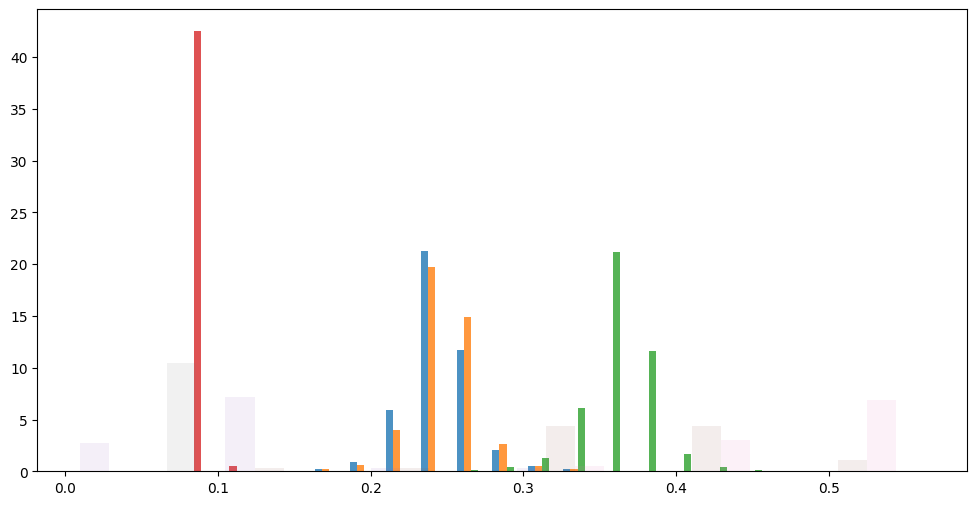

In [10]:
plt.figure(figsize=(12, 6))
vote_shares_ppc = post_pred.posterior_predictive.state_vote_share.values[:,:,0,:]
# vote_shares_ppc = np.reshape(vote_shares_ppc, (-1,) + vote_shares_ppc.shape[2:])#[:,0,:]
vote_shares_ppc = vote_shares_ppc.reshape(-1, 12, 4)
plt.hist(vote_shares_ppc.mean(axis=1), density=True, bins=20,  alpha=0.8)
plt.hist(driver.state_train[:,-1,:], density=True, bins=6, alpha=0.1)
# plt.figure(figsize=(12, 6))
plt.show()
# plt.plot(vote_shares_ppc)

In [58]:
sliced_trace = post_pred.posterior_predictive['state_vote_share'][:, :, -1, :, :]
sliced_trace = post_pred.posterior_predictive['state_vote_share'][:, :, -1, :, :]
mean_trace = np.mean(post_pred.posterior_predictive['state_vote_share'], axis=3)
sliced_mean_trace = mean_trace[:,:,0,:]

In [14]:
import arviz as az

# az.plot_ppc(data={'y': post_pred}, data_pairs={"y": "observed_vote_share"})


array([[<Axes: title={'center': 'state_vote_share'}>,
        <Axes: title={'center': 'state_vote_share'}>]], dtype=object)

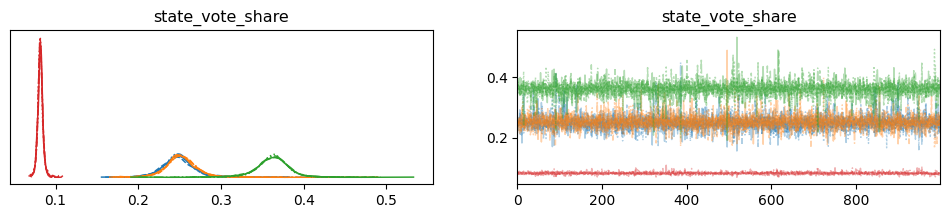

In [59]:
az.plot_trace(sliced_mean_trace, var_names=['state_vote_share'])


array([<Axes: title={'center': 'state_vote_share\n0'}>,
       <Axes: title={'center': 'state_vote_share\n1'}>,
       <Axes: title={'center': 'state_vote_share\n2'}>,
       <Axes: title={'center': 'state_vote_share\n3'}>], dtype=object)

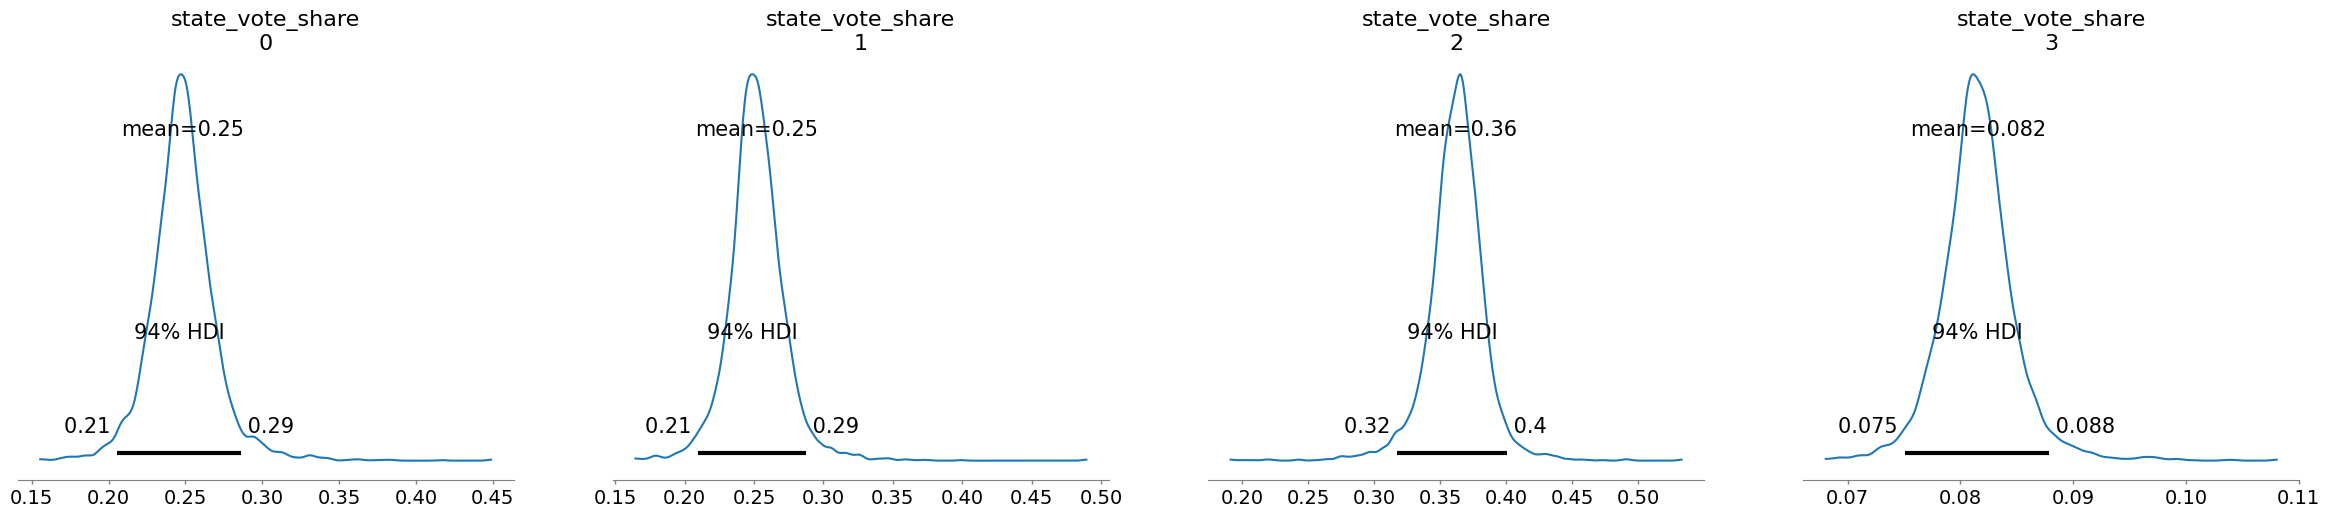

In [60]:
az.plot_posterior(sliced_mean_trace, var_names=['state_vote_share'])


array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

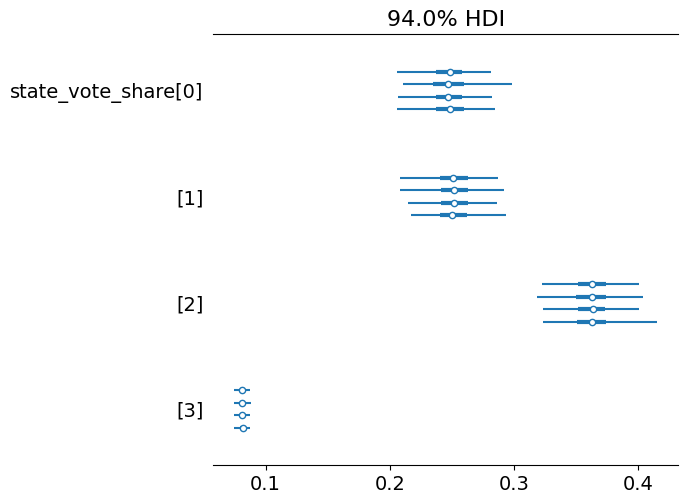

In [61]:
az.plot_forest(sliced_mean_trace, var_names=['state_vote_share'])


<Axes: >

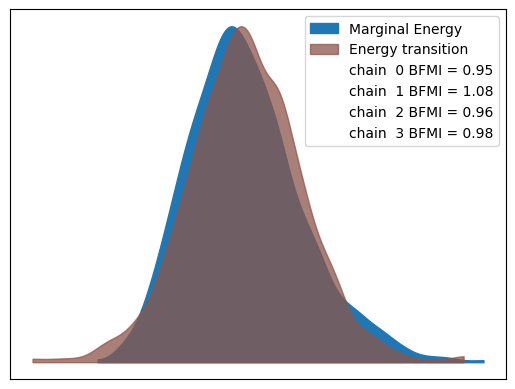

In [63]:
az.plot_energy(driver.trace)


array([[<Axes: title={'center': 'state_vote_share\n0, 0'}>,
        <Axes: title={'center': 'state_vote_share\n0, 1'}>,
        <Axes: title={'center': 'state_vote_share\n0, 2'}>,
        <Axes: title={'center': 'state_vote_share\n0, 3'}>],
       [<Axes: title={'center': 'state_vote_share\n1, 0'}>,
        <Axes: title={'center': 'state_vote_share\n1, 1'}>,
        <Axes: title={'center': 'state_vote_share\n1, 2'}>,
        <Axes: title={'center': 'state_vote_share\n1, 3'}>],
       [<Axes: title={'center': 'state_vote_share\n2, 0'}>,
        <Axes: title={'center': 'state_vote_share\n2, 1'}>,
        <Axes: title={'center': 'state_vote_share\n2, 2'}>,
        <Axes: title={'center': 'state_vote_share\n2, 3'}>],
       [<Axes: title={'center': 'state_vote_share\n3, 0'}>,
        <Axes: title={'center': 'state_vote_share\n3, 1'}>,
        <Axes: title={'center': 'state_vote_share\n3, 2'}>,
        <Axes: title={'center': 'state_vote_share\n3, 3'}>]], dtype=object)

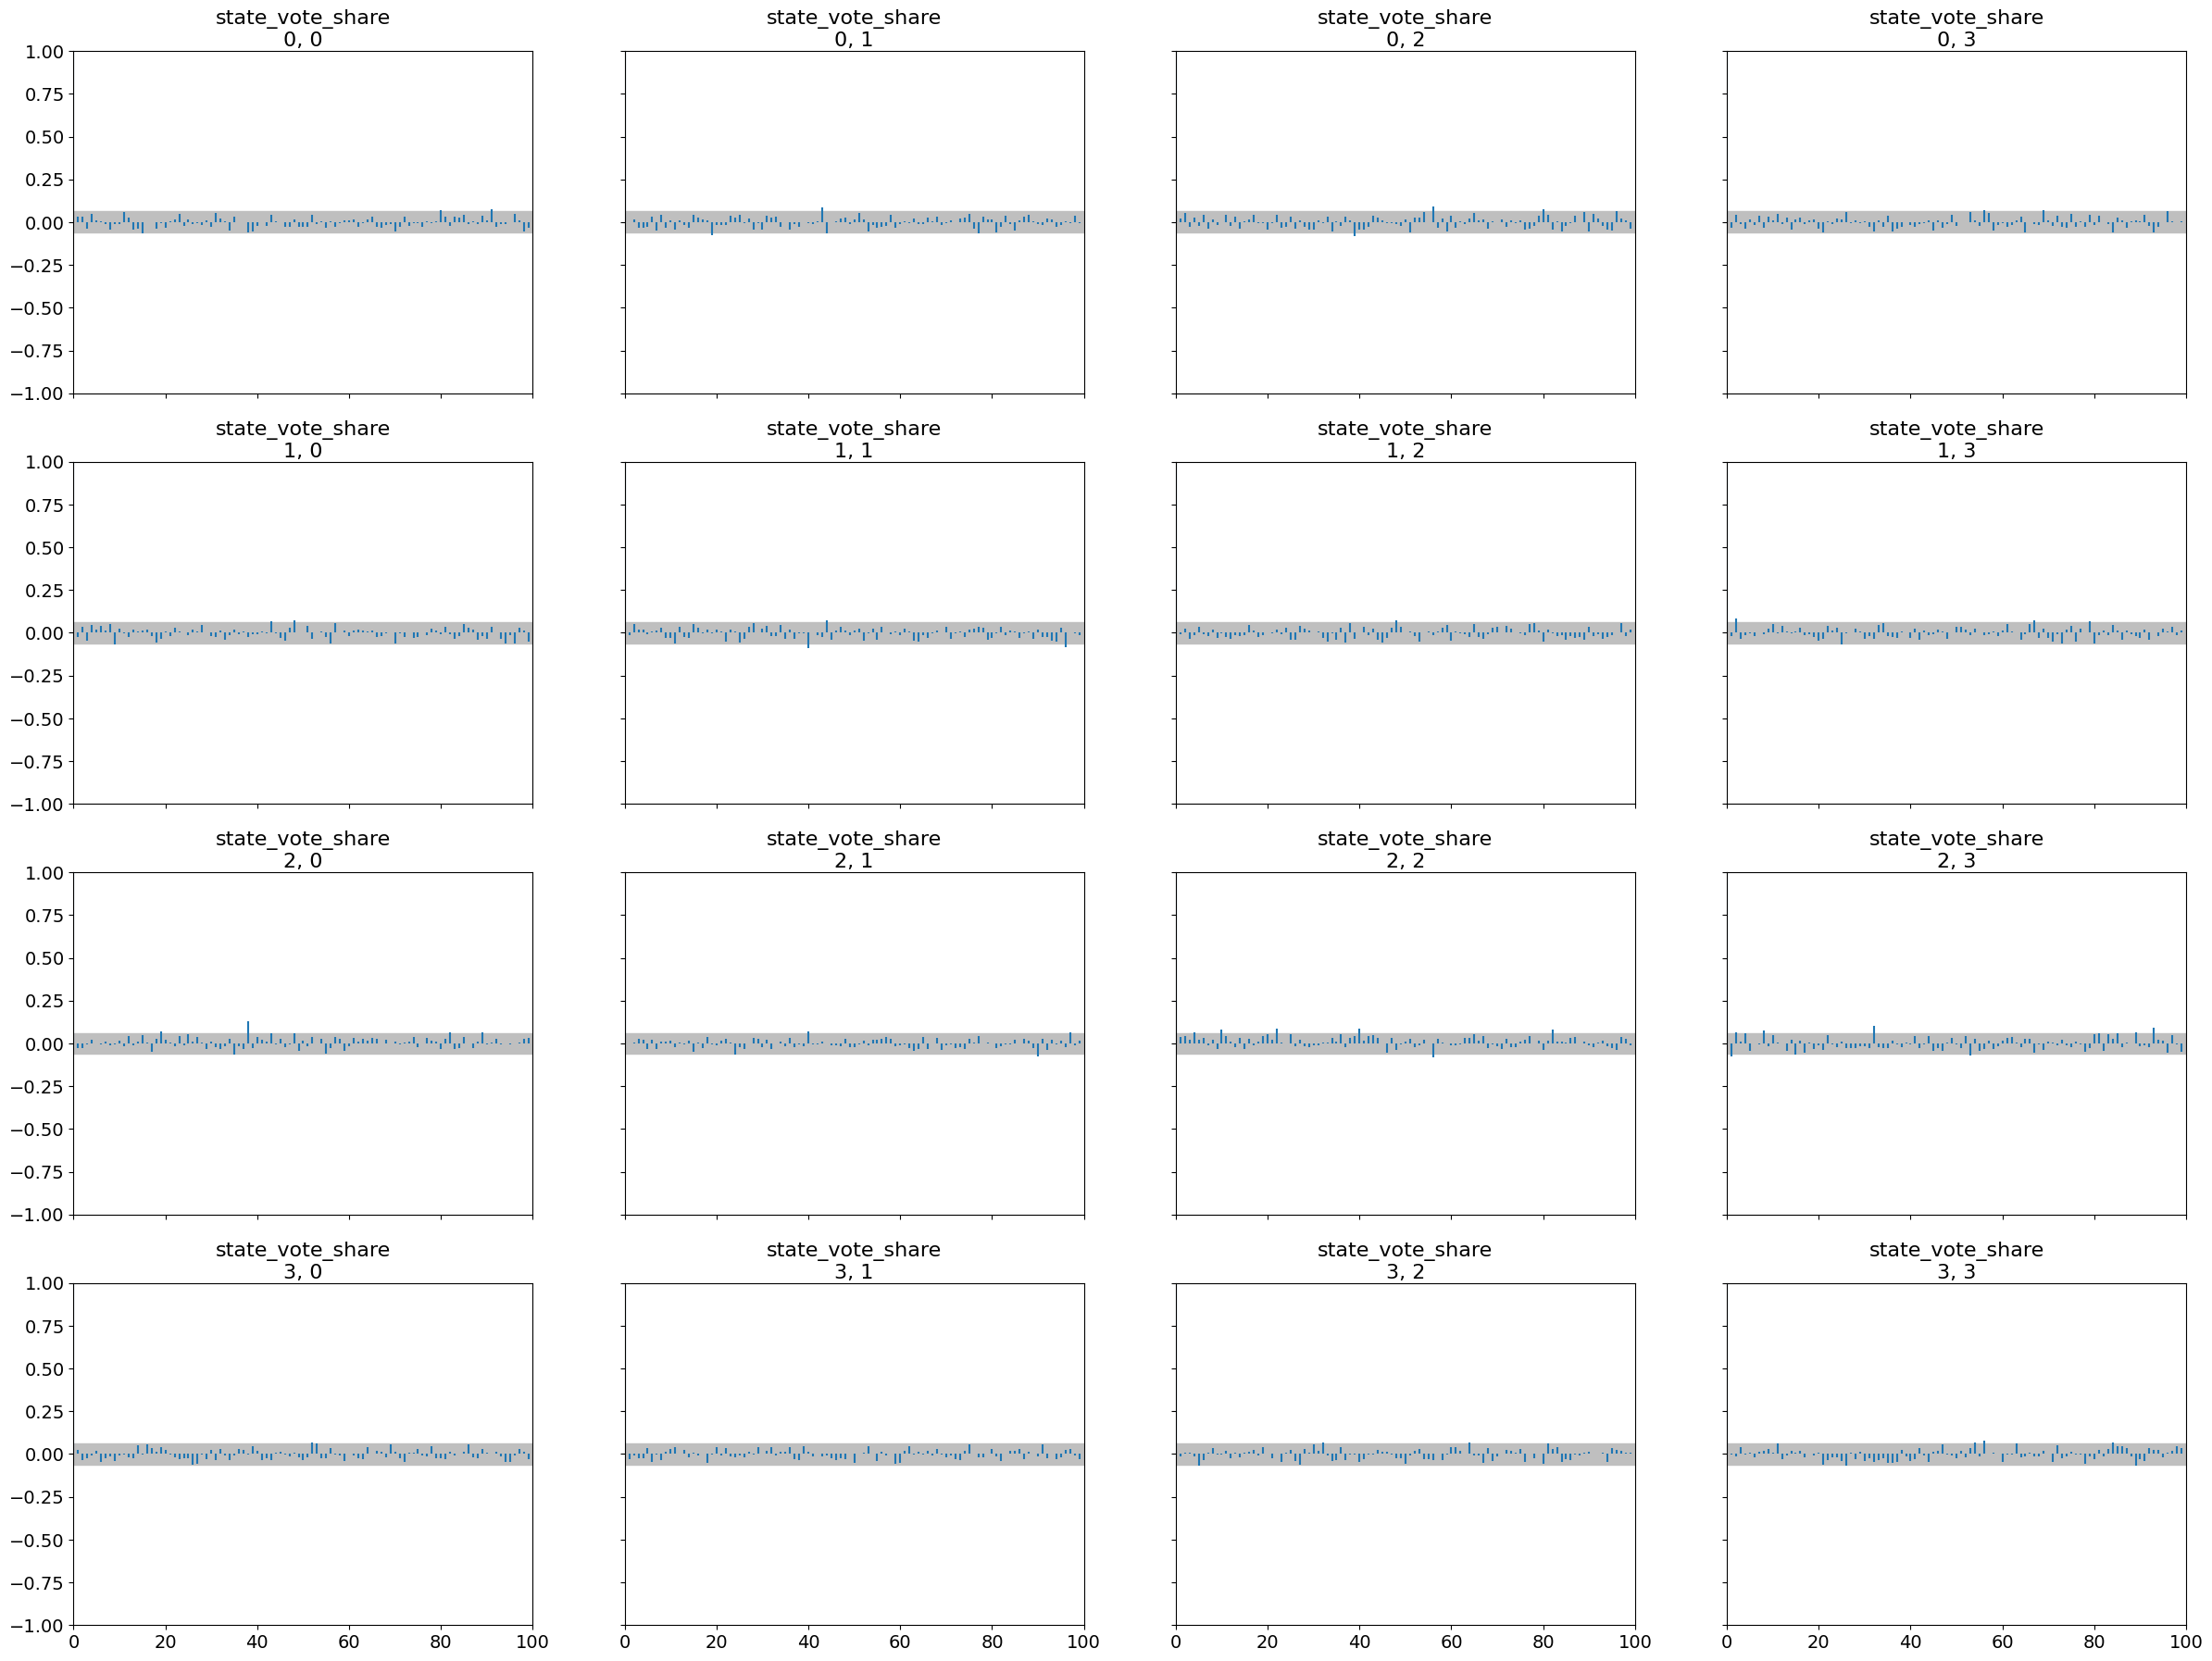

In [64]:
az.plot_autocorr(sliced_mean_trace, var_names=['state_vote_share'])


In [65]:
loo = az.loo(sliced_mean_trace, driver.model)
az.plot_loo(loo)


TypeError: log likelihood not found in inference data object

In [73]:
sliced_mean_trace.shape

(4, 1000, 4)

/home/ae_linux/Projects/ElectionForecasting/.venv/lib/python3.10/site-packages/arviz/stats/density_utils.py:487: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")


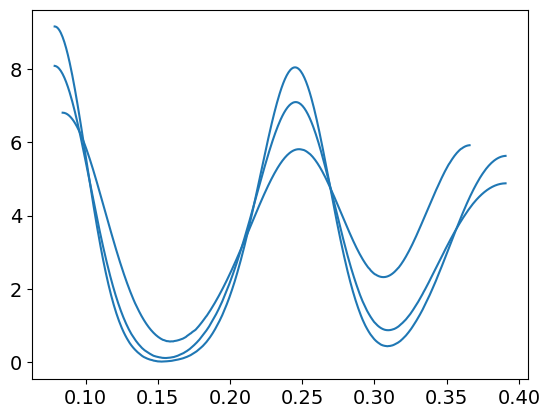

In [81]:

for i in range(sliced_mean_trace.shape[2]):
    az.plot_kde(sliced_mean_trace[:, : i].values.flatten())

array([[<Axes: ylabel='state_vote_share\n1'>, <Axes: >, <Axes: >],
       [<Axes: ylabel='state_vote_share\n2'>, <Axes: >, <Axes: >],
       [<Axes: xlabel='state_vote_share\n0', ylabel='state_vote_share\n3'>,
        <Axes: xlabel='state_vote_share\n1'>,
        <Axes: xlabel='state_vote_share\n2'>]], dtype=object)

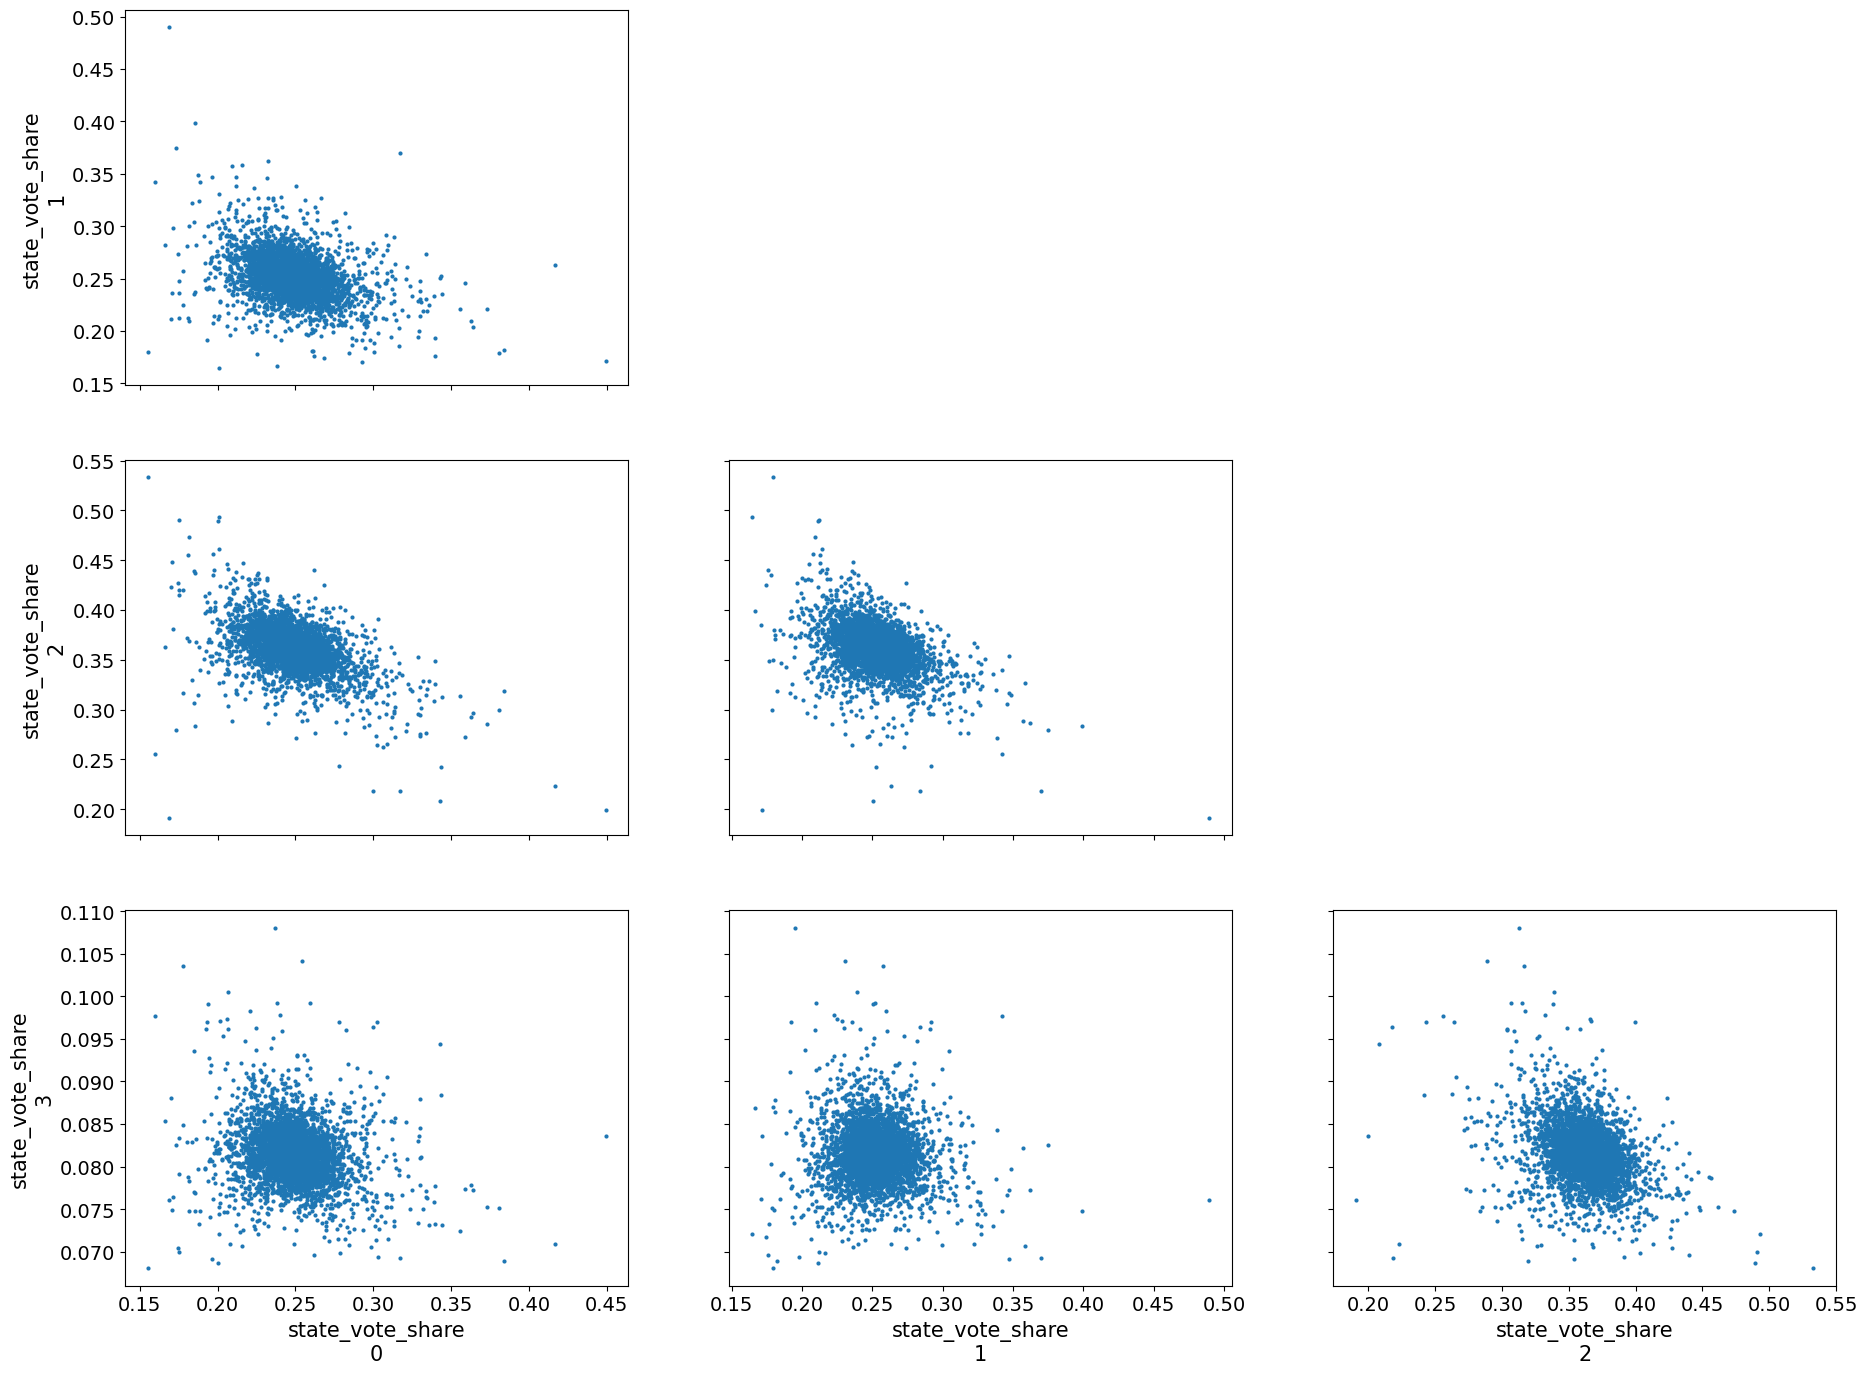

In [69]:
az.plot_pair(sliced_mean_trace, var_names=['state_vote_share'])


array([[<Axes: title={'center': 'state_vote_share\n0'}>,
        <Axes: title={'center': 'state_vote_share\n1'}>,
        <Axes: title={'center': 'state_vote_share\n2'}>],
       [<Axes: title={'center': 'state_vote_share\n3'}>, <Axes: >,
        <Axes: >]], dtype=object)

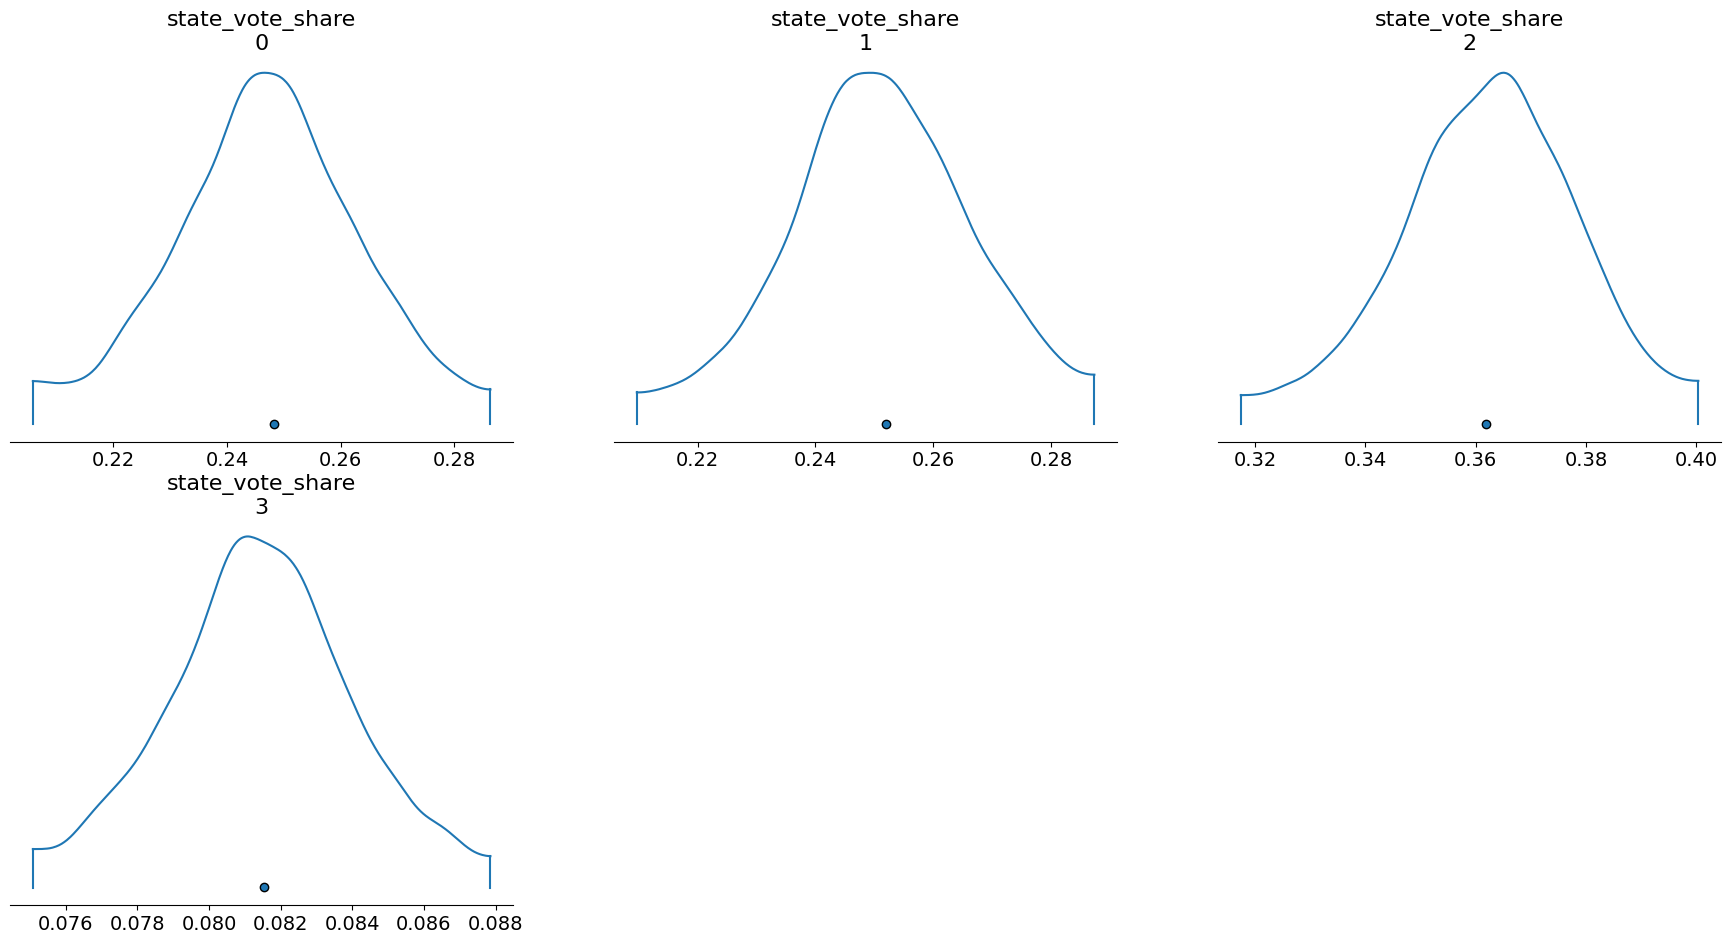

In [70]:
az.plot_density(sliced_mean_trace, var_names=['state_vote_share'])


array([<Axes: title={'center': 'state_vote_share\n0'}>,
       <Axes: title={'center': 'state_vote_share\n1'}>,
       <Axes: title={'center': 'state_vote_share\n2'}>,
       <Axes: title={'center': 'state_vote_share\n3'}>], dtype=object)

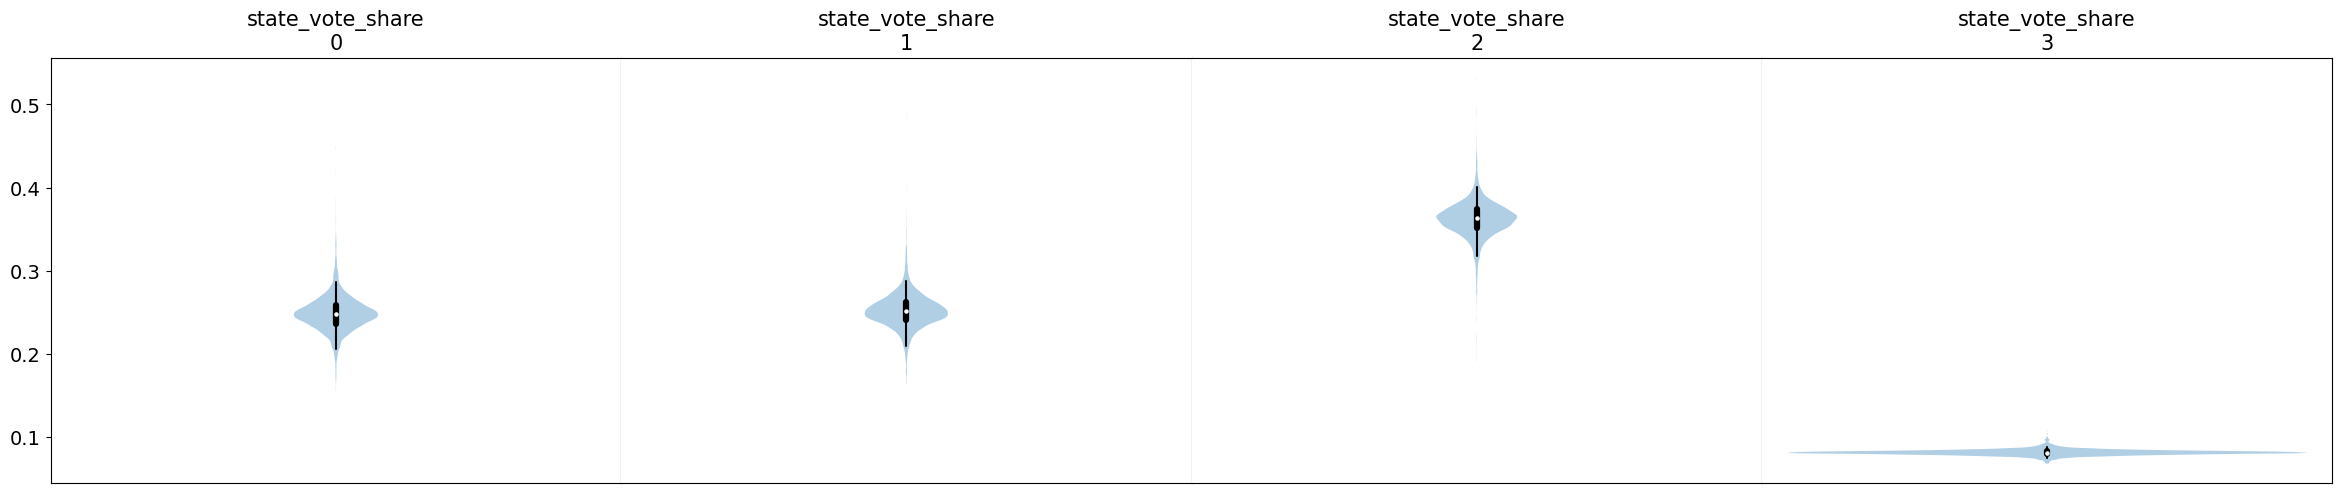

In [71]:
az.plot_violin(sliced_mean_trace, var_names=['state_vote_share'])


/home/ae_linux/Projects/ElectionForecasting/.venv/lib/python3.10/site-packages/arviz/plots/plot_utils.py:271: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (48) in plot_violin, generating only 40 plots
  warnings.warn(
/home/ae_linux/Projects/ElectionForecasting/.venv/lib/python3.10/site-packages/arviz/stats/density_utils.py:487: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")


array([[<Axes: title={'center': 'state_vote_share\n0, 0'}>,
        <Axes: title={'center': 'state_vote_share\n0, 1'}>,
        <Axes: title={'center': 'state_vote_share\n0, 2'}>,
        <Axes: title={'center': 'state_vote_share\n0, 3'}>],
       [<Axes: title={'center': 'state_vote_share\n1, 0'}>,
        <Axes: title={'center': 'state_vote_share\n1, 1'}>,
        <Axes: title={'center': 'state_vote_share\n1, 2'}>,
        <Axes: title={'center': 'state_vote_share\n1, 3'}>],
       [<Axes: title={'center': 'state_vote_share\n2, 0'}>,
        <Axes: title={'center': 'state_vote_share\n2, 1'}>,
        <Axes: title={'center': 'state_vote_share\n2, 2'}>,
        <Axes: title={'center': 'state_vote_share\n2, 3'}>],
       [<Axes: title={'center': 'state_vote_share\n3, 0'}>,
        <Axes: title={'center': 'state_vote_share\n3, 1'}>,
        <Axes: title={'center': 'state_vote_share\n3, 2'}>,
        <Axes: title={'center': 'state_vote_share\n3, 3'}>],
       [<Axes: title={'center': 'sta

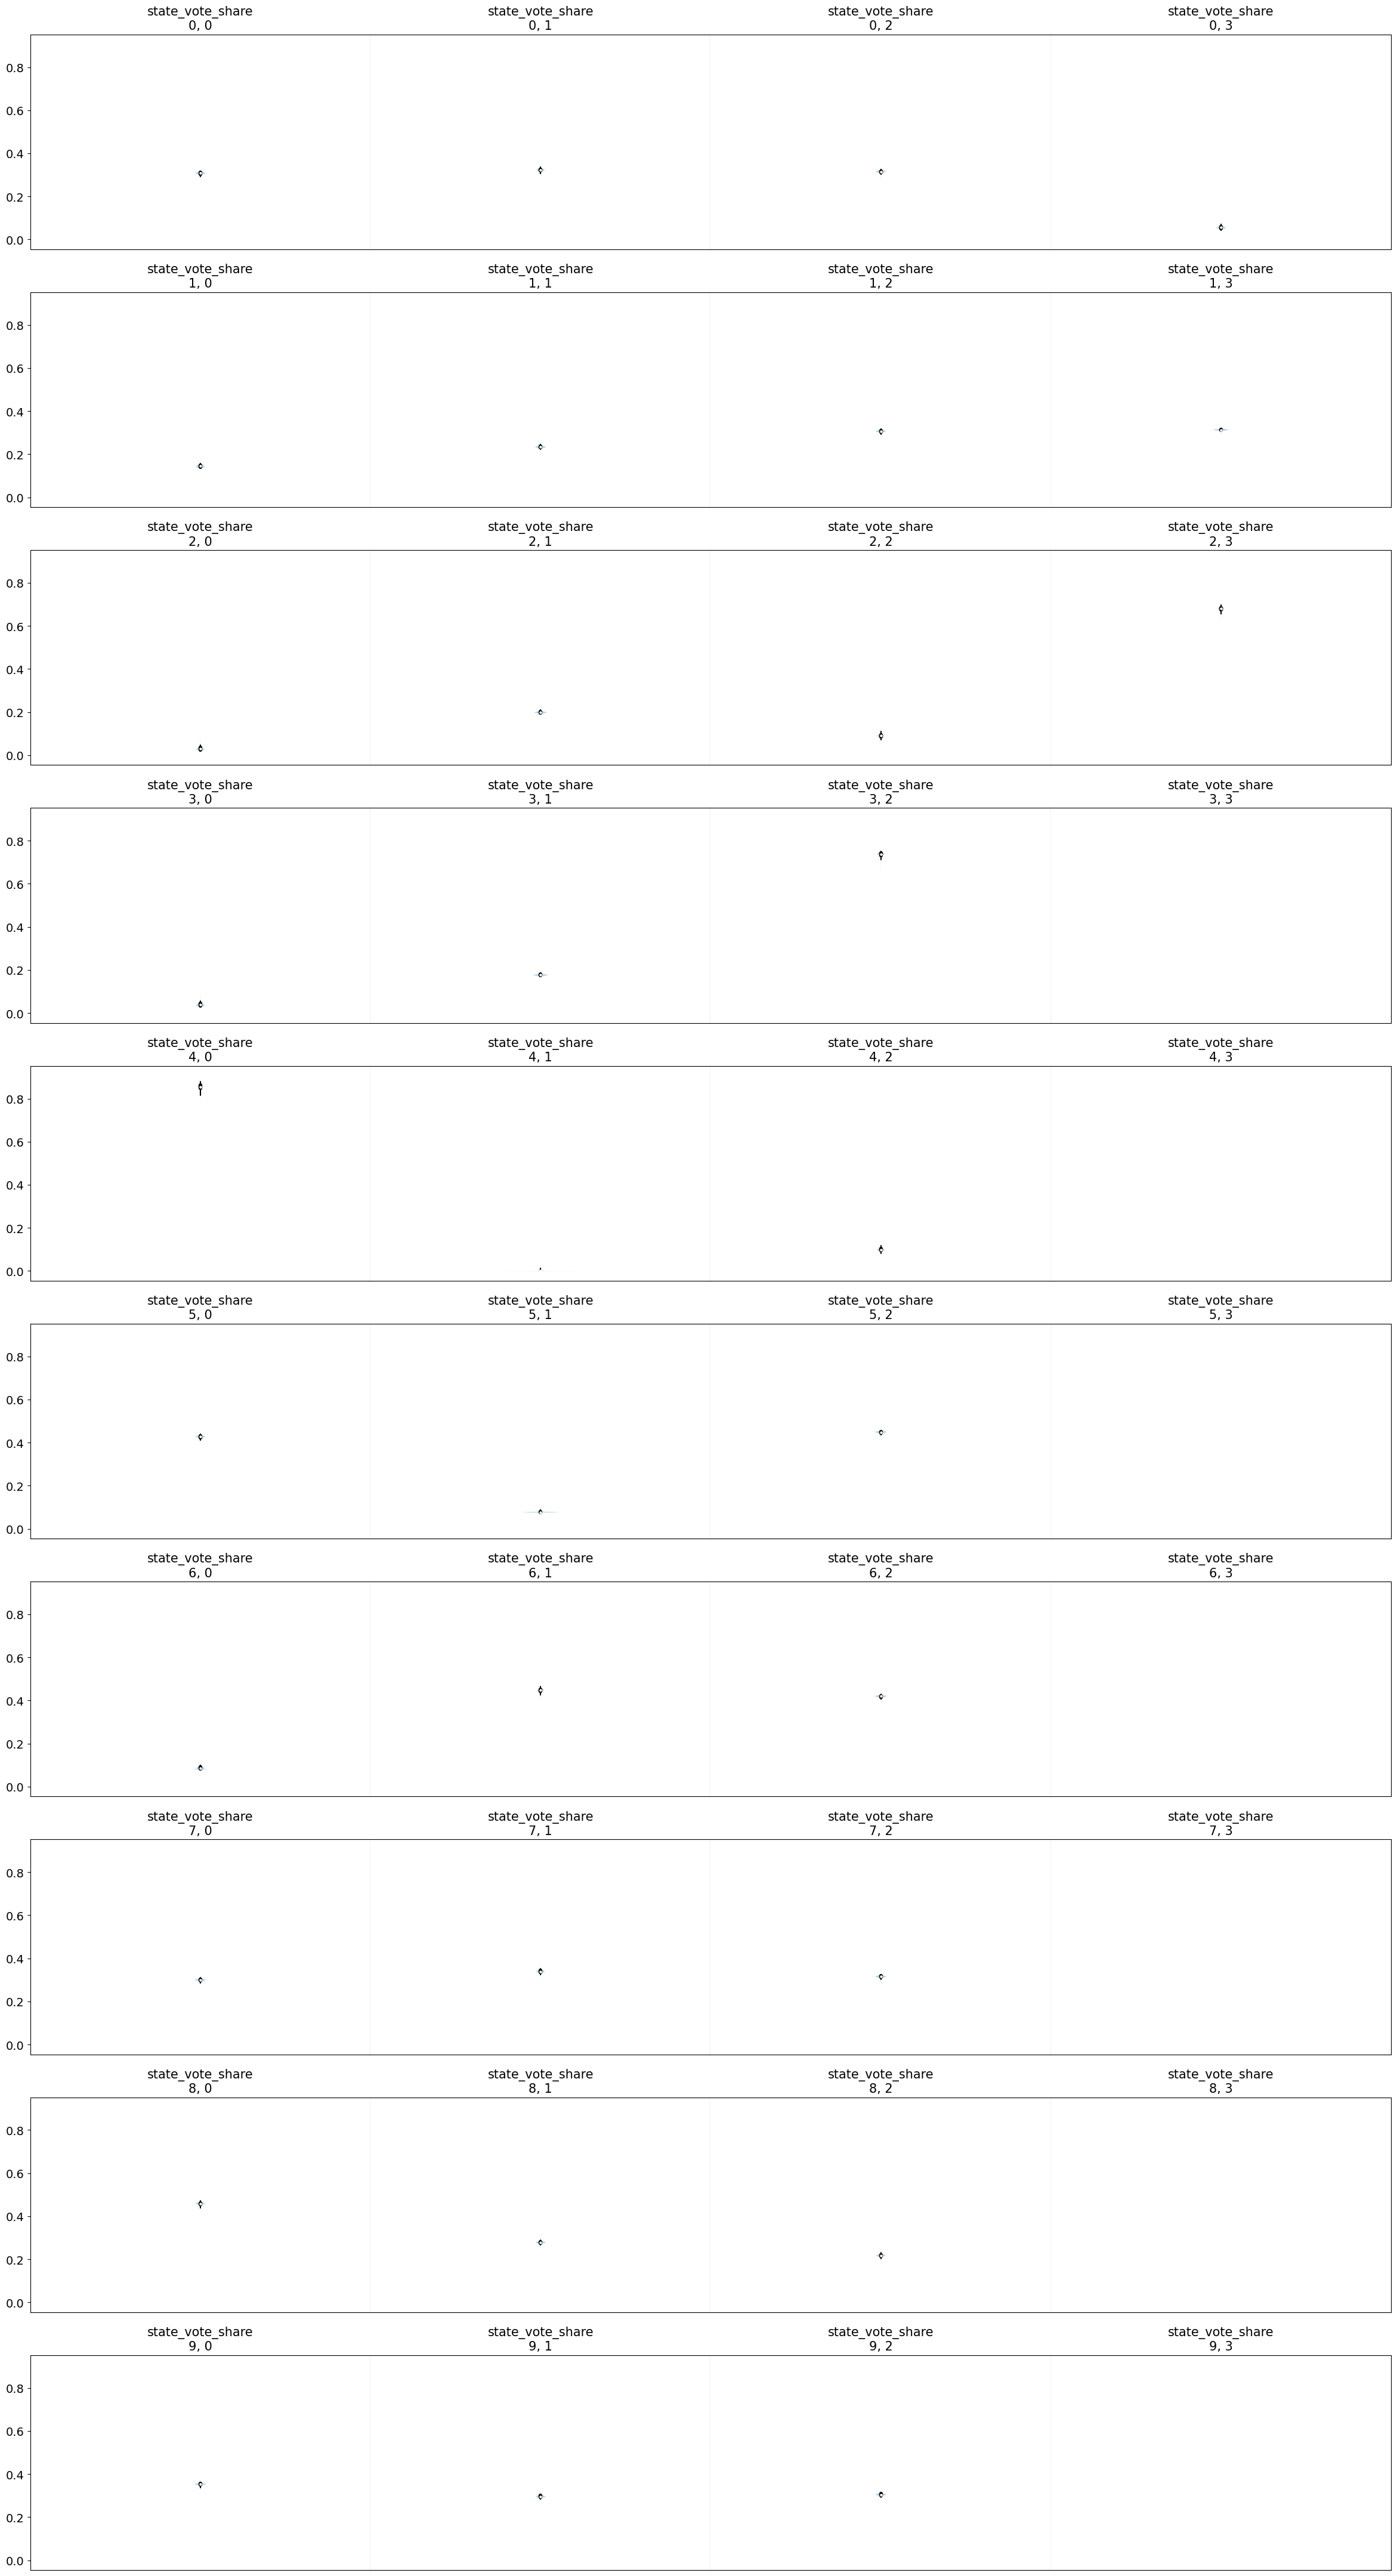

In [72]:
az.plot_violin(sliced_trace, var_names=['state_vote_share'])
